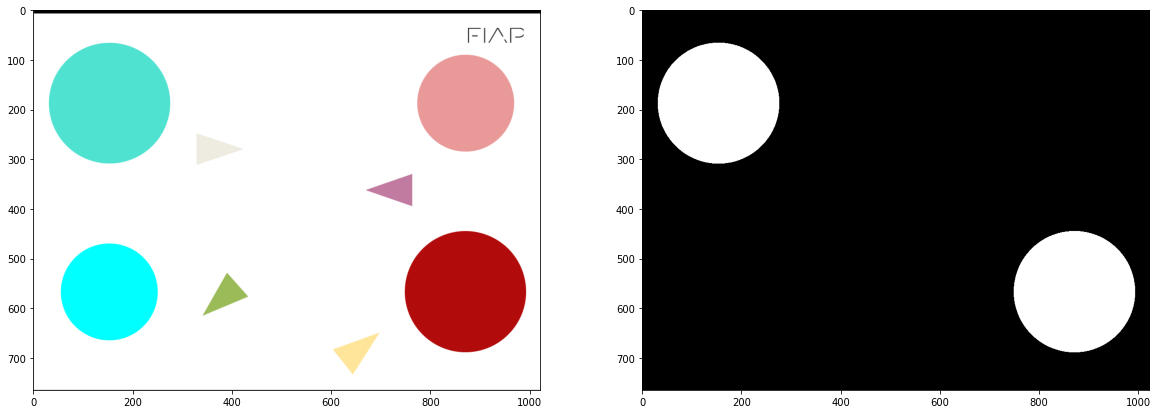

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread("circulos.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# ----------------------------------------------------------------

image_lower_hsv = np.array([80, 50, 110])  
image_upper_hsv = np.array([86, 255, 255])

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

# -------------------------------------------------------------------

image_lower_hsv2 = np.array([0, 90, 60])  
image_upper_hsv2 = np.array([2, 255, 255])

mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

# --------------------------------------------------------------------

img_hsv = cv2.bitwise_or(mask_hsv, mask_hsv2, mask = None)

# ------------------------------------------------------------------

plt.figure(figsize = (20,20))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_hsv, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

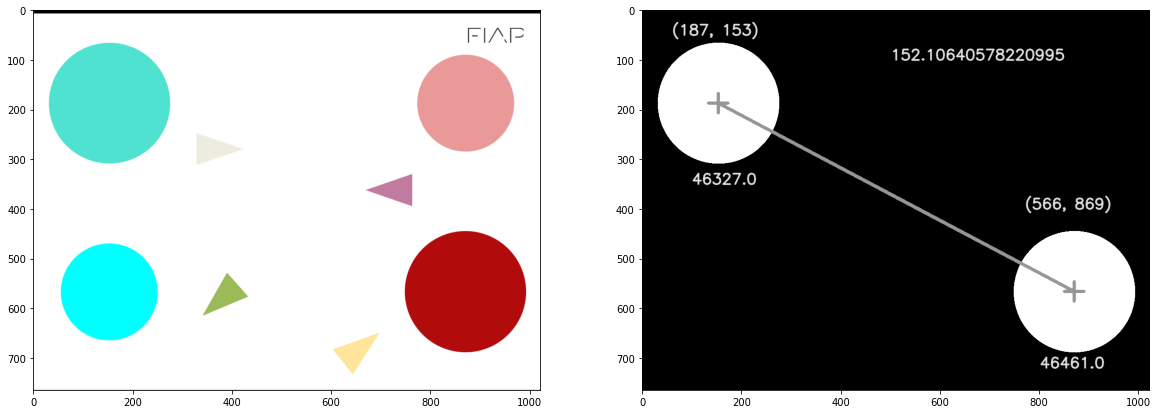

In [8]:
size = 20
color = (128,128,0)

contornos, _ = cv2.findContours(img_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

mask_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = img_hsv.copy()

cnt = contornos[0]

M = cv2.moments(cnt)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area1 = cv2.contourArea(cnt)

cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cnt2 = contornos[1]

M2 = cv2.moments(cnt2)

cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])

area2 = cv2.contourArea(cnt2)

cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)
cv2.line(contornos_img,(cx,cy),(cx2, cy2),color,5)

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
text2 = cy2 , cx2
origem = (60 , 50)
origem2 = (770 , 400)

cv2.putText(contornos_img, str(text), origem2, font,1,(200,0,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(text2), origem, font,1,(200,0,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(area1), (800, 720), font,1,(200,0,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(area2), (100, 350), font,1,(200,0,0),2,cv2.LINE_AA)

deltax = cx - cx2
deltay = cy - cy2
m = (deltay)/(deltax)
teta = (np.arctan(m) * 180)/np.pi
teta2 = 180 - teta

cv2.putText(contornos_img, str(teta2), (500, 100), font,1,(200,0,0),2,cv2.LINE_AA)
plt.figure(figsize = (20,20))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(contornos_img, cmap="Greys_r", vmin=0, vmax=255)
plt.show()